# Python: Semana 2

---

## Objetivos de Aprendizaje

Al finalizar esta sesión, serás capaz de:

1. **Recordar** las estructuras de datos fundamentales de Python y sus propiedades
2. **Comprender** la diferencia entre listas de Python y arreglos de NumPy (y por qué importa para el cómputo)
3. **Aplicar** operaciones de pandas para cargar, limpiar y resumir datos reales
4. **Analizar** datos usando filtrado, agrupación y visualización básica

## ¿Por qué Python para Economistas?

Python se ha convertido en la *lingua franca* de la ciencia de datos y la investigación aplicada (Sargent & Stachurski, 2023; VanderPlas, 2016). Ventajas clave:

- **Versatilidad**: Desde limpieza de datos hasta machine learning y web scraping
- **Ecosistema**: NumPy, pandas, scikit-learn, statsmodels forman un toolkit completo
- **Reproducibilidad**: Jupyter notebooks combinan código, resultados y documentación
- **Estándar de la industria**: Esencial para trabajos en tecnología, consultoría, bancos centrales e investigación

### Referencias Fundamentales

| Recurso | Autor(es) | Acceso |
|---------|-----------|--------|
| QuantEcon: Python Programming | Sargent & Stachurski | [quantecon.org](https://python-programming.quantecon.org/) |
| Python for Data Analysis, 3rd Ed. | McKinney | [wesmckinney.com/book](https://wesmckinney.com/book/) |
| Python Data Science Handbook | VanderPlas | [jakevdp.github.io](https://jakevdp.github.io/PythonDataScienceHandbook/) |

---
## 0. Instalación y Configuración del Entorno

### 0.1 ¿Qué es un Entorno Virtual y Por Qué lo Necesitamos?

Un **entorno virtual** es un espacio aislado donde instalamos paquetes de Python sin afectar otros proyectos o el sistema operativo.

**Analogía**: Imagina que tienes diferentes proyectos de investigación. Uno usa `pandas` versión 1.5, otro requiere la versión 2.0. Sin entornos virtuales, instalar una versión rompería la otra. Con entornos virtuales, cada proyecto tiene su propia "burbuja" con sus propias versiones de paquetes.

**¿Por qué es importante para investigación?**
- **Reproducibilidad**: Puedes especificar exactamente qué versiones usaste
- **Colaboración**: Otros pueden replicar tu entorno exacto
- **Estabilidad**: Actualizar paquetes en un proyecto no rompe otros

### 0.2 Comparación: Python vs R (Gestión de Paquetes)

| Concepto | R | Python |
|----------|---|--------|
| **Instalar paquete** | `install.packages("dplyr")` | `pip install pandas` o `conda install pandas` |
| **Cargar paquete** | `library(dplyr)` | `import pandas as pd` |
| **Dónde se ejecuta** | Dentro de R | En la terminal (instalación) / En Python (importación) |
| **Repositorio principal** | CRAN (curado) | PyPI (450,000+ paquetes) |
| **Entornos virtuales** | `renv` (opcional) | `conda` o `venv` (recomendado) |

**Diferencia clave**: En R, `install.packages()` se ejecuta desde R. En Python, la instalación (`pip`/`conda`) se hace en la **terminal**, no dentro de Python. Esto separa la gestión de paquetes del código.

### 0.3 Opciones de Instalación

#### Opción A: Anaconda

Anaconda incluye Python + 250 paquetes científicos preinstalados + gestor de entornos `conda`.

**Descargar de**: https://www.anaconda.com/download

```bash
# Después de instalar Anaconda, crear un entorno para este curso:
conda create -n economia_aplicada python=3.11
conda activate economia_aplicada
conda install numpy pandas matplotlib seaborn jupyter
```

#### Opción B: Miniconda (más ligero)

Miniconda = Python + conda, sin paquetes extra. Instalas solo lo que necesitas.

**Descargar de**: https://docs.conda.io/en/latest/miniconda.html

```bash
# Configurar canal conda-forge (mejores paquetes científicos)
conda config --add channels conda-forge
conda config --set channel_priority strict

# Crear entorno
conda create -n economia_aplicada python=3.11
conda activate economia_aplicada
conda install numpy pandas matplotlib seaborn jupyter openpyxl
```

#### Opción C: pip + venv (Python estándar)

Si ya tienes Python instalado sin Anaconda:

```bash
# Crear entorno virtual
python3 -m venv economia_env

# Activar entorno
# En macOS/Linux:
source economia_env/bin/activate
# En Windows:
economia_env\Scripts\activate

# Instalar paquetes
pip install numpy pandas matplotlib seaborn jupyter openpyxl
```

#### Opción D: Google Colab (sin instalación local, RECOMENDADO)

Si no puedes instalar software, usa Google Colab: https://colab.research.google.com

Los paquetes científicos ya están instalados. Solo necesitas cuenta de Google.

### 0.4 Comparación: conda vs pip vs venv

| Característica | conda | pip + venv |
|----------------|-------|------------|
| Gestiona Python | ✓ Sí | ✗ No (usa el Python del sistema) |
| Gestiona dependencias binarias | ✓ Sí (C, Fortran, CUDA) | ✗ Requiere compiladores |
| Velocidad de instalación | Rápido (binarios precompilados) | Puede requerir compilación |
| Uso recomendado | Ciencia de datos, ML | Desarrollo web, paquetes puros de Python |

**Recomendación de QuantEcon**: "The best [distribution] is Anaconda. All of what follows assumes that you adopt this recommendation!"

### 0.5 Verificación del Entorno

Ejecuta la siguiente celda para verificar que tu entorno está configurado correctamente.

In [3]:
# =============================================================================
# VERIFICACIÓN DEL ENTORNO
# =============================================================================
# Ejecuta esta celda primero para confirmar que tu configuración es correcta

import sys
print("=" * 60)
print("VERIFICACIÓN DEL ENTORNO DE PYTHON")
print("=" * 60)
print(f"\nVersión de Python: {sys.version}")
print(f"Ejecutable: {sys.executable}")
print()

# Lista de paquetes requeridos
paquetes_requeridos = [
    ('numpy', 'np'),
    ('pandas', 'pd'),
    ('matplotlib', 'plt'),
    ('seaborn', 'sns')
]

print("Estado de paquetes:")
print("-" * 40)

paquetes_faltantes = []

for paquete, alias in paquetes_requeridos:
    try:
        modulo = __import__(paquete)
        version = getattr(modulo, '__version__', 'versión desconocida')
        print(f"✓ {paquete}: {version}")
    except ImportError:
        print(f"✗ {paquete}: NO INSTALADO")
        paquetes_faltantes.append(paquete)

print()
if paquetes_faltantes:
    print("PAQUETES FALTANTES - Ejecuta en tu terminal:")
    print(f"   conda install {' '.join(paquetes_faltantes)}")
    print("   o")
    print(f"   pip install {' '.join(paquetes_faltantes)}")
else:
    print("✓ ¡Todos los paquetes están instalados correctamente!")

VERIFICACIÓN DEL ENTORNO DE PYTHON

Versión de Python: 3.13.11 | packaged by Anaconda, Inc. | (main, Dec 10 2025, 21:21:08) [Clang 20.1.8 ]
Ejecutable: /opt/miniconda3/bin/python

Estado de paquetes:
----------------------------------------
✓ numpy: 2.4.1
✓ pandas: 2.3.3
✓ matplotlib: 3.10.8
✓ seaborn: 0.13.2

✓ ¡Todos los paquetes están instalados correctamente!


### 0.6 Si Necesitas Instalar Paquetes Faltantes

**Desde la terminal** (NO desde Python):

```bash
# Con conda (recomendado):
conda install numpy pandas matplotlib seaborn openpyxl

# Con pip:
pip install numpy pandas matplotlib seaborn openpyxl
```

**Desde Jupyter/Colab** (solo si es necesario):

```python
# Descomentar y ejecutar si necesitas instalar desde el notebook:
# !pip install numpy pandas matplotlib seaborn openpyxl
```

**Nota**: El `!` al inicio permite ejecutar comandos de terminal desde Jupyter.

In [4]:
# =============================================================================
# IMPORTACIONES ESTÁNDAR PARA ANÁLISIS DE DATOS
# =============================================================================
# Siguiendo convenciones PEP 8 y estándares de la comunidad
# Referencia: VanderPlas (2016), McKinney (2022)

# Cómputo numérico
import numpy as np               # Arreglos y álgebra lineal

# Manipulación de datos
import pandas as pd              # DataFrames (tablas tipo Excel/Stata)

# Visualización
import matplotlib.pyplot as plt  # Gráficos base (alias estándar: plt)
import seaborn as sns            # Gráficos estadísticos

# Utilidades
import os                        # Sistema operativo (rutas, directorios)
import re                        # Expresiones regulares (texto)
import random                    # Números aleatorios

# =============================================================================
# CONFIGURACIÓN PARA REPRODUCIBILIDAD
# =============================================================================
# IMPORTANTE: Siempre fijar semillas para resultados reproducibles
# Esto es equivalente a set.seed() en R

np.random.seed(42)               # Semilla para NumPy
random.seed(42)                  # Semilla para módulo random

# Configuración de visualización
pd.set_option('display.max_columns', 20)  # Mostrar más columnas
pd.set_option('display.width', None)      # Ancho automático

# Estilo de gráficos
plt.rcParams['figure.figsize'] = [10, 6]  # Tamaño por defecto
plt.rcParams['figure.dpi'] = 100          # Resolución

print("✓ Todas las importaciones completadas exitosamente")
print(f"\nVersiones:")
print(f"  NumPy: {np.__version__}")
print(f"  Pandas: {pd.__version__}")

✓ Todas las importaciones completadas exitosamente

Versiones:
  NumPy: 2.4.1
  Pandas: 2.3.3


---
## 1. Ejemplo Introductorio


In [ ]:
# =============================================================================
# EJEMPLO MOTIVACIONAL: Análisis de Datos Económicos
# =============================================================================
# No te preocupes por entender cada línea - lo explicaremos todo después

# Datos de PIB per cápita (USD, 2022) - Fuente: Banco Mundial
datos_pib = {
    'país': ['México', 'Argentina', 'Chile', 'Colombia', 'Perú', 'Brasil'],
    'pib_per_capita': [10046, 13650, 15355, 6630, 6692, 8918],
    'crecimiento_2022': [3.0, 5.0, 2.4, 7.5, 2.7, 2.9],
    'poblacion_millones': [128.9, 45.8, 19.5, 51.9, 34.0, 215.3]
}

# Crear DataFrame (tabla estructurada)
df_pib = pd.DataFrame(datos_pib) #<-

# Mostrar los datos
print("Datos de PIB en América Latina (2022):")
print("=" * 50)
display(df_pib)

# Estadísticas descriptivas
print("\nEstadísticas descriptivas:")
print(f"  PIB per cápita promedio: ${df_pib['pib_per_capita'].mean():,.0f}")
print(f"  Crecimiento promedio: {df_pib['crecimiento_2022'].mean():.1f}%")
print(f"  País con mayor PIB pc: {df_pib.loc[df_pib['pib_per_capita'].idxmax(), 'país']}")

Datos de PIB en América Latina (2022):


,país,pib_per_capita,crecimiento_2022,poblacion_millones
0,México,10046,3.0,128.9
1,Argentina,13650,5.0,45.8
2,Chile,15355,2.4,19.5
3,Colombia,6630,7.5,51.9
4,Perú,6692,2.7,34.0
5,Brasil,8918,2.9,215.3



Estadísticas descriptivas:
  PIB per cápita promedio: $10,215
  Crecimiento promedio: 3.9%
  País con mayor PIB pc: Chile


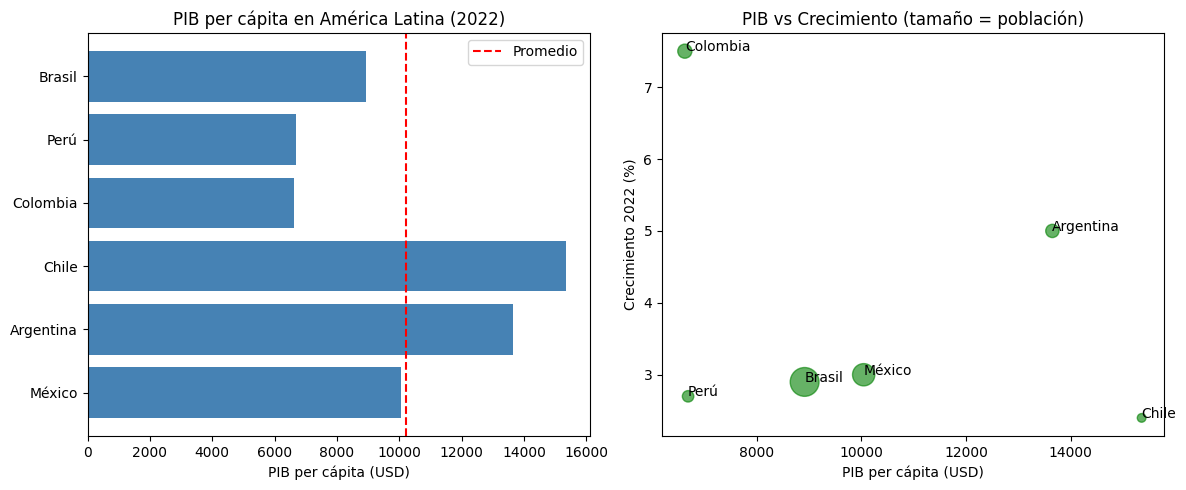

In [6]:
# Visualización rápida
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Gráfico 1: PIB per cápita por país
axes[0].barh(df_pib['país'], df_pib['pib_per_capita'], color='steelblue')
axes[0].set_xlabel('PIB per cápita (USD)')
axes[0].set_title('PIB per cápita en América Latina (2022)')
axes[0].axvline(df_pib['pib_per_capita'].mean(), color='red', linestyle='--', label='Promedio')
axes[0].legend()

# Gráfico 2: Relación PIB vs Crecimiento
axes[1].scatter(df_pib['pib_per_capita'], df_pib['crecimiento_2022'], 
                s=df_pib['poblacion_millones']*2, alpha=0.6, color='green')
for i, pais in enumerate(df_pib['país']):
    axes[1].annotate(pais, (df_pib['pib_per_capita'].iloc[i], df_pib['crecimiento_2022'].iloc[i]))
axes[1].set_xlabel('PIB per cápita (USD)')
axes[1].set_ylabel('Crecimiento 2022 (%)')
axes[1].set_title('PIB vs Crecimiento (tamaño = población)')

plt.tight_layout()
plt.show()

---
## 2. Tipos de Datos Fundamentales

Python tiene varios tipos de datos incorporados. Entender sus propiedades es esencial para programar eficientemente.

### 2.1 Resumen de Tipos de Datos

| Tipo | Sintaxis | ¿Mutable? | ¿Ordenado? | Uso Principal |
|------|----------|-----------|------------|---------------|
| `int` | `42` | - | - | Números enteros |
| `float` | `3.14` | - | - | Números decimales |
| `str` | `"texto"` | No | Sí | Texto |
| `bool` | `True/False` | - | - | Lógicos |
| `list` | `[1, 2, 3]` | Sí | Sí | Colecciones generales |
| `tuple` | `(1, 2, 3)` | No | Sí | Datos fijos (coordenadas) |
| `dict` | `{'a': 1}` | Sí | Sí* | Mapeo clave-valor |
| `set` | `{1, 2, 3}` | Sí | No | Valores únicos |

*Los diccionarios mantienen orden de inserción desde Python 3.7

### 2.2 Tipos Primitivos: Números y Booleanos

In [7]:
# =============================================================================
# TIPOS PRIMITIVOS
# =============================================================================

# Enteros (int)
poblacion = 128_900_000  # Los guiones bajos mejoran legibilidad
print(f"Población: {poblacion:,}")  # Formato con comas
print(f"Tipo: {type(poblacion)}")

# Flotantes (float)
pib_per_capita = 10046.50
tasa_inflacion = 0.0486  # 4.86%
print(f"\nPIB per cápita: ${pib_per_capita:,.2f}")
print(f"Inflación: {tasa_inflacion:.2%}")  # Formato porcentaje

# Booleanos (bool)
es_emergente = True
en_recesion = False
print(f"\n¿Es mercado emergente? {es_emergente}")

# NOTA: Los booleanos son numéricos en Python
print(f"\nAritmética booleana: True + True = {True + True}")  # = 2
print(f"Suma de lista booleana: {sum([True, False, True, True])}")  # Cuenta True's

Población: 128,900,000
Tipo: <class 'int'>

PIB per cápita: $10,046.50
Inflación: 4.86%

¿Es mercado emergente? True

Aritmética booleana: True + True = 2
Suma de lista booleana: 3


### 2.3 Cadenas de Texto (Strings)

In [6]:
# =============================================================================
# CADENAS DE TEXTO (STRINGS)
# =============================================================================

# Creación de strings
pais = "México"
descripcion = 'País de América Latina'  # Comillas simples o dobles

# f-strings: interpolación de variables (Python 3.6+)
# Equivalente a paste0() en R o string interpolation
mensaje = f"El país {pais} tiene un PIB per cápita de ${pib_per_capita:,.0f}"
print(mensaje)

# Operaciones con strings
print(f"\nMayúsculas: {pais.upper()}")
print(f"Minúsculas: {pais.lower()}")
print(f"Longitud: {len(pais)} caracteres")

# Concatenación
region = "LATAM"
codigo = pais[:3].upper() + "_" + region  # Slicing: primeros 3 caracteres
print(f"Código: {codigo}")

El país México tiene un PIB per cápita de $10,046

Mayúsculas: MÉXICO
Minúsculas: méxico
Longitud: 6 caracteres
Código: MÉX_LATAM


### 2.4 Listas: Colecciones Ordenadas y Mutables

In [8]:
# =============================================================================
# LISTAS: Colecciones ordenadas y mutables
# =============================================================================
# Equivalente aproximado a c() en R, pero más flexible

# Crear una lista
paises_latam = ["México", "Argentina", "Chile", "Colombia", "Perú"]
print(f"Lista de países: {paises_latam}")
print(f"Longitud: {len(paises_latam)}")

# IMPORTANTE: Python usa indexación desde 0 (como C, Java)
# R usa indexación desde 1
print(f"\nPrimer elemento (índice 0): {paises_latam[0]}")
print(f"Segundo elemento (índice 1): {paises_latam[1]}")
print(f"Último elemento (índice -1): {paises_latam[-1]}")
print(f"Penúltimo (índice -2): {paises_latam[-2]}")

Lista de países: ['México', 'Argentina', 'Chile', 'Colombia', 'Perú']
Longitud: 5

Primer elemento (índice 0): México
Segundo elemento (índice 1): Argentina
Último elemento (índice -1): Perú
Penúltimo (índice -2): Colombia


In [10]:
# =============================================================================
# SLICING (subconjuntos): Extraer subconjuntos
# =============================================================================
# Sintaxis: lista[inicio:fin:paso]
# NOTA: El índice 'fin' NO se incluye (es exclusivo)

numeros = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
print(f"Lista original: {numeros}")

print(f"\nSlicing básico:")
print(f"  numeros[2:5] = {numeros[2:5]}")      # Elementos 2, 3, 4 (NO incluye 5)
print(f"  numeros[:4] = {numeros[:4]}")        # Primeros 4 elementos
print(f"  numeros[6:] = {numeros[6:]}")        # Desde índice 6 hasta el final
print(f"  numeros[-3:] = {numeros[-3:]}")      # Últimos 3 elementos

print(f"\nSlicing con paso:")
print(f"  numeros[::2] = {numeros[::2]}")      # Cada 2 elementos (pares de índice)
print(f"  numeros[1::2] = {numeros[1::2]}")    # Índices impares
print(f"  numeros[::-1] = {numeros[::-1]}")    # Lista invertida

Lista original: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

Slicing básico:
  numeros[2:5] = [2, 3, 4]
  numeros[:4] = [0, 1, 2, 3]
  numeros[6:] = [6, 7, 8, 9]
  numeros[-3:] = [7, 8, 9]

Slicing con paso:
  numeros[::2] = [0, 2, 4, 6, 8]
  numeros[1::2] = [1, 3, 5, 7, 9]
  numeros[::-1] = [9, 8, 7, 6, 5, 4, 3, 2, 1, 0]


In [ ]:
# Las listas son MUTABLES - podemos modificarlas
print(f"Lista original: {paises_latam}")

# Modificar un elemento
paises_latam[0] = "MX"  # Cambiar México por MX
print(f"Después de modificar [0]: {paises_latam}")

# Agregar elementos
paises_latam.append("Brasil")  # Agregar al final
print(f"Después de append: {paises_latam}")

# Restaurar
paises_latam[0] = "México"

#que hará .insert(i, x)
#y que hará .remove(x)

Lista original: ['México', 'Argentina', 'Chile', 'Colombia', 'Perú']
Después de modificar [0]: ['MX', 'Argentina', 'Chile', 'Colombia', 'Perú']
Después de append: ['MX', 'Argentina', 'Chile', 'Colombia', 'Perú', 'Brasil']


In [12]:
# Listas pueden contener TIPOS MIXTOS (a diferencia de vectores en R)
lista_mixta = ["México", 128.9, True, [1, 2, 3]]
print(f"Lista mixta: {lista_mixta}")
print(f"Tipos: {[type(x).__name__ for x in lista_mixta]}")

# Lista de listas (matriz-like)
matriz_lista = [
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
]
print(f"\nElemento [1][2]: {matriz_lista[1][2]}")  # Fila 1, Columna 2 = 6

Lista mixta: ['México', 128.9, True, [1, 2, 3]]
Tipos: ['str', 'float', 'bool', 'list']

Elemento [1][2]: 6


### 2.5 Tuplas: Colecciones Inmutables

In [13]:
# =============================================================================
# TUPLAS: Colecciones ordenadas e INMUTABLES
# =============================================================================
# Úsalas para datos que no deben cambiar (coordenadas, constantes)

# Crear tupla
coordenadas_cdmx = (19.4326, -99.1332)  # Latitud, Longitud
print(f"Coordenadas CDMX: {coordenadas_cdmx}")
print(f"Latitud: {coordenadas_cdmx[0]}")

# Intentar modificar genera error
try:
    coordenadas_cdmx[0] = 20.0
except TypeError as e:
    print(f"\n✗ Error al modificar: {e}")
    print("  Las tuplas son INMUTABLES por diseño - protegen integridad de datos")

# Uso común: retorno múltiple de funciones
def estadisticas_basicas(datos):
    """Retorna media y desviación estándar como tupla."""
    media = np.mean(datos)
    std = np.std(datos)
    return media, std  # Retorna tupla implícitamente

datos_ejemplo = [10, 20, 30, 40, 50]
media, desv = estadisticas_basicas(datos_ejemplo)  # Desempaquetado
print(f"\nMedia: {media}, Desv. Est.: {desv}")

Coordenadas CDMX: (19.4326, -99.1332)
Latitud: 19.4326

✗ Error al modificar: 'tuple' object does not support item assignment
  Las tuplas son INMUTABLES por diseño - protegen integridad de datos

Media: 30.0, Desv. Est.: 14.142135623730951


### 2.6 Diccionarios: Mapeo Clave-Valor

In [ ]:
# =============================================================================
# DICCIONARIOS: Mapeo clave-valor
# =============================================================================
# Fundamentales para trabajar con JSON, APIs, configuraciones
# Similar a named lists en R, pero más estructurado

# Crear diccionario
mexico = {
    "nombre": "México",
    "codigo_iso": "MEX",
    "poblacion": 128_900_000,
    "pib_per_capita": 10046,
    "es_ocde": True,
    "idiomas": ["español", "náhuatl", "maya"]  # Valor puede ser lista
}

print("Diccionario de México:")
for clave, valor in mexico.items():
    print(f"  {clave}: {valor}")

# Acceso por clave
print(f"\nAcceso por clave:")
print(f"  mexico['nombre'] = {mexico['nombre']}")
print(f"  mexico['pib_per_capita'] = {mexico['pib_per_capita']}")

# Agregar/modificar
mexico["region"] = "América del Norte"
mexico["pib_per_capita"] = 10500  # Actualizar
print(f"\nDespués de modificaciones:")
print(f"  Región: {mexico['region']}")
print(f"  PIB actualizado: {mexico['pib_per_capita']}")

Diccionario de México:
  nombre: México
  codigo_iso: MEX
  poblacion: 128900000
  pib_per_capita: 10046
  es_ocde: True
  idiomas: ['español', 'náhuatl', 'maya']

Acceso por clave:
  mexico['nombre'] = México
  mexico['pib_per_capita'] = 10046

Después de modificaciones:
  Región: América del Norte
  PIB actualizado: 10500


### 2.7 Conjuntos (Sets): Valores Únicos

In [13]:
# =============================================================================
# CONJUNTOS (SETS): Colecciones de valores únicos
# =============================================================================
# Útiles para eliminar duplicados y operaciones de conjuntos

# Crear set - automáticamente elimina duplicados
categorias_con_duplicados = ["emergente", "OCDE", "G20", "emergente", "OCDE"]
categorias_unicas = set(categorias_con_duplicados)
print(f"Lista con duplicados: {categorias_con_duplicados}")
print(f"Set (únicos): {categorias_unicas}")

# Operaciones de conjuntos
paises_ocde = {"México", "Chile", "Colombia", "USA", "Canadá"}
paises_g20 = {"México", "Argentina", "Brasil", "USA"}

print(f"\nOCDE: {paises_ocde}")
print(f"G20: {paises_g20}")
print(f"Intersección (ambos): {paises_ocde & paises_g20}")
print(f"Unión (cualquiera): {paises_ocde | paises_g20}")
print(f"Solo en OCDE: {paises_ocde - paises_g20}")

# Verificar membresía (muy rápido: O(1))
print(f"\n¿México en OCDE? {'México' in paises_ocde}")

Lista con duplicados: ['emergente', 'OCDE', 'G20', 'emergente', 'OCDE']
Set (únicos): {'emergente', 'G20', 'OCDE'}

OCDE: {'Canadá', 'Colombia', 'USA', 'Chile', 'México'}
G20: {'Argentina', 'USA', 'México', 'Brasil'}
Intersección (ambos): {'USA', 'México'}
Unión (cualquiera): {'Brasil', 'USA', 'México', 'Argentina', 'Colombia', 'Chile', 'Canadá'}
Solo en OCDE: {'Colombia', 'Chile', 'Canadá'}

¿México en OCDE? True


---
## 3. Control de Flujo: Bucles y Funciones

### 3.1 Bucles For

**Estilo Python**: Iterar directamente sobre elementos, NO sobre índices (a menos que los necesites).

if condición:
    # código si condición es True
elif otra_condición:
    # código si la primera es False y esta es True
else:
    # código si ninguna condición es True

In [16]:
# =============================================================================
# BUCLES FOR: Iteración sobre secuencias
# =============================================================================

# Forma NO Python (estilo C/Stata)
print("Forma NO recomendada (índices):")
for i in range(len(paises_latam)):
    print(f"  {i}: {paises_latam[i]}")

# Forma Python - iterar directamente
print("\nForma Python (directa):")
for pais in paises_latam:
    print(f"  {pais}")

# Si necesitas índice Y valor: usar enumerate()
print("\nCon enumerate() (índice + valor):")
for i, pais in enumerate(paises_latam):
    print(f"  {i}: {pais}")

Forma NO recomendada (índices):
  0: México
  1: Argentina
  2: Chile
  3: Colombia
  4: Perú
  5: Brasil

Forma Python (directa):
  México
  Argentina
  Chile
  Colombia
  Perú
  Brasil

Con enumerate() (índice + valor):
  0: México
  1: Argentina
  2: Chile
  3: Colombia
  4: Perú
  5: Brasil


In [17]:
# Acumular resultados en un bucle
cuadrados = []  # Lista vacía
for i in range(10):
    cuadrados.append(i ** 2)

print(f"Cuadrados: {cuadrados}")

Cuadrados: [0, 1, 4, 9, 16, 25, 36, 49, 64, 81]


### 3.2 Comprensión de Listas (List Comprehension)

Forma elegante y eficiente de crear listas. Es más rápida que bucles explícitos.

In [16]:
# =============================================================================
# COMPRENSIÓN DE LISTAS: Forma elegante de crear listas
# =============================================================================
# Sintaxis: [expresión for elemento in iterable if condición]

# Equivalente al bucle anterior, en UNA línea
cuadrados = [i ** 2 for i in range(10)]
print(f"Cuadrados: {cuadrados}")

# Con condición (filtro)
cuadrados_pares = [i ** 2 for i in range(10) if i % 2 == 0]
print(f"Cuadrados de pares: {cuadrados_pares}")

# Aplicación económica: convertir a millones
poblaciones = [128_900_000, 45_800_000, 19_500_000, 51_900_000]
poblaciones_millones = [p / 1_000_000 for p in poblaciones]
print(f"\nPoblaciones en millones: {poblaciones_millones}")

# Crear diccionario con comprensión
paises = ["México", "Argentina", "Chile", "Colombia"]
pib_dict = {pais: pib for pais, pib in zip(paises, [10046, 13650, 15355, 6630])}
print(f"\nDiccionario PIB: {pib_dict}")

Cuadrados: [0, 1, 4, 9, 16, 25, 36, 49, 64, 81]
Cuadrados de pares: [0, 4, 16, 36, 64]

Poblaciones en millones: [128.9, 45.8, 19.5, 51.9]

Diccionario PIB: {'México': 10046, 'Argentina': 13650, 'Chile': 15355, 'Colombia': 6630}


### 3.3 Funciones Definidas por el Usuario

Las funciones permiten escribir código reutilizable y modular.

In [17]:
# =============================================================================
# FUNCIONES: Bloques de código reutilizables
# =============================================================================

def calcular_tasa_crecimiento(valor_inicial, valor_final, periodos=1):
    """
    Calcula la tasa de crecimiento entre dos valores.
    
    Parámetros
    ----------
    valor_inicial : float
        Valor en el periodo inicial
    valor_final : float
        Valor en el periodo final
    periodos : int, opcional
        Número de periodos (default=1 para tasa simple)
        
    Retorna
    -------
    float
        Tasa de crecimiento como porcentaje
        
    Ejemplo
    -------
    >>> calcular_tasa_crecimiento(100, 110)
    10.0
    """
    if periodos == 1:
        tasa = ((valor_final - valor_inicial) / valor_inicial) * 100
    else:
        # Tasa compuesta anualizada
        tasa = ((valor_final / valor_inicial) ** (1/periodos) - 1) * 100
    return tasa

# Usar la función
pib_2020 = 1073  # Miles de millones USD
pib_2023 = 1322

crecimiento_simple = calcular_tasa_crecimiento(pib_2020, pib_2023)
crecimiento_anual = calcular_tasa_crecimiento(pib_2020, pib_2023, periodos=3)

print(f"PIB México 2020: ${pib_2020}B")
print(f"PIB México 2023: ${pib_2023}B")
print(f"Crecimiento total: {crecimiento_simple:.1f}%")
print(f"Crecimiento anual compuesto: {crecimiento_anual:.1f}%")

PIB México 2020: $1073B
PIB México 2023: $1322B
Crecimiento total: 23.2%
Crecimiento anual compuesto: 7.2%


In [18]:
# Funciones lambda: funciones anónimas de una línea
# Útiles para operaciones simples, especialmente con pandas

# Función lambda para convertir a porcentaje
a_porcentaje = lambda x: x * 100

tasas_decimales = [0.05, 0.03, 0.07, 0.02]
tasas_porcentaje = [a_porcentaje(t) for t in tasas_decimales]
print(f"Tasas decimales: {tasas_decimales}")
print(f"Tasas porcentaje: {tasas_porcentaje}")

Tasas decimales: [0.05, 0.03, 0.07, 0.02]
Tasas porcentaje: [5.0, 3.0, 7.000000000000001, 2.0]


---
## 4. NumPy: Cómputo Numérico Eficiente

### 4.1 ¿Por Qué NumPy? El Problema de la Velocidad

**Referencia QuantEcon, Lectura 9**: Python puro es lento para operaciones numéricas porque:
- El tipado dinámico requiere verificar tipos en cada operación
- Las listas no almacenan datos contiguamente en memoria

NumPy resuelve esto con arreglos de tipo fijo almacenados contiguamente, operados por código C/Fortran precompilado.

In [19]:
# =============================================================================
# ¿POR QUÉ NUMPY? DEMOSTRACIÓN DE VELOCIDAD
# =============================================================================
import time

# Crear datos grandes
n = 1_000_000
lista_python = list(range(n))
array_numpy = np.arange(n)

# Medir tiempo con lista de Python
inicio = time.time()
resultado_lista = [x ** 2 for x in lista_python]
tiempo_lista = time.time() - inicio

# Medir tiempo con NumPy
inicio = time.time()
resultado_numpy = array_numpy ** 2
tiempo_numpy = time.time() - inicio

print("Comparación de Rendimiento (1 millón de elementos)")
print("=" * 50)
print(f"Lista Python (comprensión): {tiempo_lista:.4f} segundos")
print(f"NumPy (vectorizado):        {tiempo_numpy:.4f} segundos")
print(f"\n🚀 NumPy es {tiempo_lista/tiempo_numpy:.0f}x más rápido")
print("\n💡 CONCLUSIÓN: Para operaciones numéricas, SIEMPRE usa NumPy")

Comparación de Rendimiento (1 millón de elementos)
Lista Python (comprensión): 0.0253 segundos
NumPy (vectorizado):        0.0012 segundos

🚀 NumPy es 20x más rápido

💡 CONCLUSIÓN: Para operaciones numéricas, SIEMPRE usa NumPy


### 4.2 Creación de Arreglos

In [20]:
# =============================================================================
# CREACIÓN DE ARREGLOS NUMPY
# =============================================================================

# Desde lista de Python
vector = np.array([1, 2, 3, 4, 5])
print(f"Vector: {vector}")
print(f"Forma (shape): {vector.shape}")  # (5,) - arreglo 1D
print(f"Tipo de datos: {vector.dtype}")   # int64

# Matriz 2D
matriz = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
])
print(f"\nMatriz:\n{matriz}")
print(f"Forma: {matriz.shape}")  # (3, 3)

Vector: [1 2 3 4 5]
Forma (shape): (5,)
Tipo de datos: int64

Matriz:
[[1 2 3]
 [4 5 6]
 [7 8 9]]
Forma: (3, 3)


In [21]:
# Funciones de creación especiales
print("Arreglos especiales:")
print(f"\nCeros (3x3):\n{np.zeros((3, 3))}")
print(f"\nUnos (2x4):\n{np.ones((2, 4))}")
print(f"\nIdentidad (4x4):\n{np.eye(4)}")
print(f"\nSecuencia (0 a 9): {np.arange(10)}")
print(f"\nLinspace (0 a 1, 5 puntos): {np.linspace(0, 1, 5)}")
print(f"\nAleatorios (3x3):\n{np.random.random((3, 3))}")

Arreglos especiales:

Ceros (3x3):
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]

Unos (2x4):
[[1. 1. 1. 1.]
 [1. 1. 1. 1.]]

Identidad (4x4):
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]

Secuencia (0 a 9): [0 1 2 3 4 5 6 7 8 9]

Linspace (0 a 1, 5 puntos): [0.   0.25 0.5  0.75 1.  ]

Aleatorios (3x3):
[[0.37454012 0.95071431 0.73199394]
 [0.59865848 0.15601864 0.15599452]
 [0.05808361 0.86617615 0.60111501]]


### 4.3 Indexación y Slicing en NumPy

In [22]:
# =============================================================================
# INDEXACIÓN EN NUMPY
# =============================================================================

# Crear matriz de ejemplo
arr = np.arange(12).reshape(3, 4)  # 0-11 en matriz 3x4
print(f"Matriz original:\n{arr}")
print(f"Forma: {arr.shape}\n")

# Acceso a elementos: arr[fila, columna]
print("Acceso a elementos:")
print(f"  arr[0, 0] = {arr[0, 0]}")
print(f"  arr[1, 2] = {arr[1, 2]}")
print(f"  arr[-1, -1] = {arr[-1, -1]}")

# Slicing: arr[filas, columnas]
print(f"\nSlicing:")
print(f"  Primera fila: {arr[0, :]}")
print(f"  Primera columna: {arr[:, 0]}")
print(f"  Submatriz [0:2, 1:3]:\n{arr[0:2, 1:3]}")

Matriz original:
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
Forma: (3, 4)

Acceso a elementos:
  arr[0, 0] = 0
  arr[1, 2] = 6
  arr[-1, -1] = 11

Slicing:
  Primera fila: [0 1 2 3]
  Primera columna: [0 4 8]
  Submatriz [0:2, 1:3]:
[[1 2]
 [5 6]]


### 4.4 Indexación Booleana (Máscaras)

In [23]:
# =============================================================================
# INDEXACIÓN BOOLEANA: Filtrado condicional
# =============================================================================
# Equivalente a filter() en R, esencial para selección de datos

datos = np.array([23, 45, 12, 67, 34, 89, 56, 11, 78, 42])
print(f"Datos: {datos}")

# Crear máscara booleana
mascara = datos > 50
print(f"\nMáscara (>50): {mascara}")
print(f"Valores >50: {datos[mascara]}")

# En una línea
print(f"\nValores <30: {datos[datos < 30]}")

# Condiciones combinadas: usar & (and), | (or)
# IMPORTANTE: Usar paréntesis por precedencia de operadores
entre_20_60 = datos[(datos >= 20) & (datos <= 60)]
print(f"Valores entre 20 y 60: {entre_20_60}")

Datos: [23 45 12 67 34 89 56 11 78 42]

Máscara (>50): [False False False  True False  True  True False  True False]
Valores >50: [67 89 56 78]

Valores <30: [23 12 11]
Valores entre 20 y 60: [23 45 34 56 42]


### 4.5 Operaciones Vectorizadas

In [24]:
# =============================================================================
# OPERACIONES VECTORIZADAS
# =============================================================================
# Las operaciones se aplican elemento por elemento automáticamente

a = np.array([1, 2, 3, 4])
b = np.array([10, 20, 30, 40])

print(f"a = {a}")
print(f"b = {b}")
print(f"\nOperaciones elemento a elemento:")
print(f"  a + b = {a + b}")
print(f"  a * b = {a * b}")
print(f"  a ** 2 = {a ** 2}")
print(f"  np.sqrt(b) = {np.sqrt(b)}")
print(f"  np.log(b) = {np.log(b)}")

# Funciones de agregación
print(f"\nAgregaciones:")
print(f"  np.sum(a) = {np.sum(a)}")
print(f"  np.mean(a) = {np.mean(a)}")
print(f"  np.std(a) = {np.std(a)}")
print(f"  np.max(a), np.min(a) = {np.max(a)}, {np.min(a)}")

a = [1 2 3 4]
b = [10 20 30 40]

Operaciones elemento a elemento:
  a + b = [11 22 33 44]
  a * b = [ 10  40  90 160]
  a ** 2 = [ 1  4  9 16]
  np.sqrt(b) = [3.16227766 4.47213595 5.47722558 6.32455532]
  np.log(b) = [2.30258509 2.99573227 3.40119738 3.68887945]

Agregaciones:
  np.sum(a) = 10
  np.mean(a) = 2.5
  np.std(a) = 1.118033988749895
  np.max(a), np.min(a) = 4, 1


### 4.6 Vectores vs Vectores Columna (¡Importante para Econometría!)

In [25]:
# =============================================================================
# VECTORES vs VECTORES COLUMNA
# =============================================================================
# Esta distinción importa para operaciones matriciales en econometría
# En OLS: β = (X'X)^(-1)X'y requiere dimensiones correctas

# Arreglo 1D (ambiguo para álgebra matricial)
vector_1d = np.array([1, 2, 3, 4])
print(f"Arreglo 1D: {vector_1d}")
print(f"Forma: {vector_1d.shape}")  # (4,) - ¿fila o columna?

# Vector columna explícito
vector_col = vector_1d.reshape(-1, 1)  # -1 = "infiere esta dimensión"
print(f"\nVector columna:\n{vector_col}")
print(f"Forma: {vector_col.shape}")  # (4, 1) - definitivamente columna

# Vector fila explícito
vector_fila = vector_1d.reshape(1, -1)
print(f"\nVector fila: {vector_fila}")
print(f"Forma: {vector_fila.shape}")  # (1, 4) - definitivamente fila

# Producto matricial: vector_fila @ vector_col = escalar
producto = vector_fila @ vector_col
print(f"\nProducto v_fila @ v_col = {producto}")

Arreglo 1D: [1 2 3 4]
Forma: (4,)

Vector columna:
[[1]
 [2]
 [3]
 [4]]
Forma: (4, 1)

Vector fila: [[1 2 3 4]]
Forma: (1, 4)

Producto v_fila @ v_col = [[30]]


---
## 5. Pandas: Análisis de Datos Tabulares

pandas proporciona el `DataFrame`, similar a una hoja de Excel o dataset de Stata/R. Es la herramienta principal para manipulación de datos en Python.

### 5.1 Cargar e Inspeccionar Datos

In [18]:
# =============================================================================
# CARGAR DATOS
# =============================================================================
# pandas puede leer múltiples formatos:
#   pd.read_csv()   - Archivos CSV
#   pd.read_excel() - Archivos Excel (.xlsx)
#   pd.read_stata() - Archivos Stata (.dta)
#   pd.read_json()  - Archivos JSON

# Cargar datos de Twitter (actualiza la ruta según tu ubicación)
# df = pd.read_excel('../data/twitter.xlsx')

# Para este ejemplo, creamos datos sintéticos similares
np.random.seed(42)
n = 200

df = pd.DataFrame({
    'username': [f'user_{i}' for i in range(n)],
    'text': [f'Este es el tweet número {i} con contenido aleatorio' for i in range(n)],
    'retweet_count': np.random.exponential(500, n).astype(int),
    'like_count': np.random.exponential(200, n).astype(int),
    'reply_count': np.random.exponential(50, n).astype(int),
    'treatment': np.random.choice([0, 1], n),
    'date': pd.date_range('2022-10-01', periods=n, freq='H')
})

# Inspección básica
print("=" * 60)
print("RESUMEN DEL DATASET")
print("=" * 60)
print(f"Filas: {len(df):,}")
print(f"Columnas: {len(df.columns)}")
print(f"Memoria: {df.memory_usage(deep=True).sum() / 1024:.1f} KB")

RESUMEN DEL DATASET
Filas: 200
Columnas: 7
Memoria: 41.5 KB


/var/folders/nn/5pmh2dx54zlcjrtwpv4s17y40000gn/T/ipykernel_43539/2916740645.py:24: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  'date': pd.date_range('2022-10-01', periods=n, freq='H')


In [27]:
# Ver primeras filas
df.head()

,username,text,retweet_count,like_count,reply_count,treatment,date
0,user_0,Este es el tweet número 0 con contenido aleatorio,234,205,5,0,2022-10-01 00:00:00
1,user_1,Este es el tweet número 1 con contenido aleatorio,1505,17,116,1,2022-10-01 01:00:00
2,user_2,Este es el tweet número 2 con contenido aleatorio,658,35,35,1,2022-10-01 02:00:00
3,user_3,Este es el tweet número 3 con contenido aleatorio,456,457,87,1,2022-10-01 03:00:00
4,user_4,Este es el tweet número 4 con contenido aleatorio,84,186,19,0,2022-10-01 04:00:00


In [28]:
# Información de tipos y valores faltantes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   username       200 non-null    object        
 1   text           200 non-null    object        
 2   retweet_count  200 non-null    int64         
 3   like_count     200 non-null    int64         
 4   reply_count    200 non-null    int64         
 5   treatment      200 non-null    int64         
 6   date           200 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 11.1+ KB


In [19]:
# Estadísticas descriptivas
df.describe()

,retweet_count,like_count,reply_count,treatment,date
count,200.000000,200.000000,200.00000,200.000000,200
mean,472.245000,197.465000,57.00500,0.510000,2022-10-05 03:30:00.000000256
min,2.000000,1.000000,0.00000,0.000000,2022-10-01 00:00:00
25%,129.000000,60.000000,14.00000,0.000000,2022-10-03 01:45:00
50%,340.500000,155.500000,37.00000,1.000000,2022-10-05 03:30:00
75%,706.750000,271.000000,83.00000,1.000000,2022-10-07 05:15:00
max,2167.000000,931.000000,408.00000,1.000000,2022-10-09 07:00:00
std,456.116913,184.078006,60.91212,0.501154,NaN


### 5.2 Selección de Datos

In [30]:
# =============================================================================
# SELECCIÓN DE COLUMNAS
# =============================================================================

# Una columna (retorna Series)
print("Una columna (Series):")
print(df['retweet_count'].head())

# Múltiples columnas (retorna DataFrame)
print("\nMúltiples columnas (DataFrame):")
df[['username', 'retweet_count', 'like_count']].head()

Una columna (Series):
0     234
1    1505
2     658
3     456
4      84
Name: retweet_count, dtype: int64

Múltiples columnas (DataFrame):


,username,retweet_count,like_count
0,user_0,234,205
1,user_1,1505,17
2,user_2,658,35
3,user_3,456,457
4,user_4,84,186


In [31]:
# =============================================================================
# FILTRADO DE FILAS CON .loc[]
# =============================================================================
# .loc[] es el equivalente a filter() en R o keep if en Stata

# Condición simple
alto_engagement = df.loc[df['retweet_count'] > 1000]
print(f"Posts con >1000 retweets: {len(alto_engagement)}")

# Condiciones múltiples (& para AND, | para OR)
populares = df.loc[
    (df['retweet_count'] > 500) & 
    (df['like_count'] > 200)
]
print(f"Posts con >500 RT Y >200 likes: {len(populares)}")

# Seleccionar filas Y columnas específicas
df.loc[
    df['retweet_count'] > 1000,
    ['username', 'retweet_count', 'treatment']
].head()

Posts con >1000 retweets: 29
Posts con >500 RT Y >200 likes: 27


,username,retweet_count,treatment
1,user_1,1505,1
7,user_7,1005,1
11,user_11,1751,1
33,user_33,1486,0
34,user_34,1685,1


### 5.3 Crear y Modificar Columnas

In [32]:
# =============================================================================
# CREAR COLUMNAS CON .assign()
# =============================================================================
# .assign() es el equivalente a mutate() en dplyr de R

df = df.assign(
    # Engagement total
    total_engagement = lambda x: x['retweet_count'] + x['like_count'] + x['reply_count'],
    
    # Log de retweets (log1p = log(1+x) para manejar ceros)
    log_retweets = lambda x: np.log1p(x['retweet_count']),
    
    # Variable categórica
    engagement_nivel = lambda x: pd.cut(
        x['retweet_count'], 
        bins=[0, 100, 500, 1000, np.inf],
        labels=['bajo', 'medio', 'alto', 'viral']
    )
)

df[['username', 'retweet_count', 'total_engagement', 'log_retweets', 'engagement_nivel']].head(10)

,username,retweet_count,total_engagement,log_retweets,engagement_nivel
0,user_0,234,444,5.459586,medio
1,user_1,1505,1638,7.317212,viral
2,user_2,658,728,6.490724,alto
3,user_3,456,1000,6.124683,medio
4,user_4,84,289,4.442651,bajo
5,user_5,84,197,4.442651,bajo
6,user_6,29,74,3.401197,bajo
7,user_7,1005,1222,6.913737,viral
8,user_8,459,577,6.131226,medio
9,user_9,615,654,6.423247,alto


### 5.4 Agrupación y Agregación

In [33]:
# =============================================================================
# GROUPBY: Estadísticas por grupo
# =============================================================================
# Equivalente a collapse en Stata o group_by + summarize en R

# Media por grupo de tratamiento
por_tratamiento = df.groupby('treatment')['retweet_count'].mean()
print("Media de retweets por tratamiento:")
print(por_tratamiento)
print(f"\nDiferencia de medias: {por_tratamiento[1] - por_tratamiento[0]:.2f}")

Media de retweets por tratamiento:
treatment
0    384.908163
1    556.156863
Name: retweet_count, dtype: float64

Diferencia de medias: 171.25


In [34]:
# Múltiples agregaciones
resumen = (
    df
    .groupby('treatment')
    .agg({
        'retweet_count': ['mean', 'std', 'count'],
        'like_count': ['mean', 'std'],
        'total_engagement': 'mean'
    })
    .round(2)
)

print("Resumen por tratamiento:")
resumen

Resumen por tratamiento:


retweet_count               like_count         total_engagement
                   mean     std count       mean     std             mean
treatment                                                                
0                384.91  384.61    98     189.35  183.58           623.85
1                556.16  503.32   102     205.26  185.12           825.55

### 5.5 Merge (Unión de DataFrames)

In [35]:
# =============================================================================
# MERGE: Unir datasets
# =============================================================================
# Equivalente a merge en Stata o left_join en R

# Crear datos de características de usuarios
usuarios_unicos = df['username'].unique()
df_usuarios = pd.DataFrame({
    'username': usuarios_unicos,
    'verificado': np.random.choice([0, 1], len(usuarios_unicos), p=[0.9, 0.1]),
    'seguidores': np.random.exponential(10000, len(usuarios_unicos)).astype(int)
})

print(f"DataFrame principal: {len(df)} filas")
print(f"DataFrame usuarios: {len(df_usuarios)} filas")

# Hacer merge
df_merged = df.merge(
    df_usuarios,
    on='username',    # Columna clave
    how='left'        # Tipo de join (left, right, inner, outer)
)

print(f"DataFrame merged: {len(df_merged)} filas")
df_merged[['username', 'retweet_count', 'verificado', 'seguidores']].head()

DataFrame principal: 200 filas
DataFrame usuarios: 200 filas
DataFrame merged: 200 filas


,username,retweet_count,verificado,seguidores
0,user_0,234,0,2330
1,user_1,1505,0,268
2,user_2,658,0,2002
3,user_3,456,0,8747
4,user_4,84,0,5471


### 5.6 Exportar Resultados

In [36]:
# =============================================================================
# EXPORTAR RESULTADOS
# =============================================================================

# Crear tabla de resumen
tabla_resumen = (
    df
    .groupby('treatment')
    .agg({
        'retweet_count': 'mean',
        'like_count': 'mean',
        'reply_count': 'mean',
        'username': 'count'
    })
    .round(2)
    .rename(columns={'username': 'n_obs'})
)

tabla_resumen.index = ['Control', 'Tratamiento']
print("Tabla de resumen:")
display(tabla_resumen)

# Exportar a LaTeX (para papers)
print("\nCódigo LaTeX:")
print(tabla_resumen.to_latex())

# Otros formatos de exportación:
# tabla_resumen.to_csv('resumen.csv')
# tabla_resumen.to_excel('resumen.xlsx')
# df.to_stata('datos.dta')

Tabla de resumen:


,retweet_count,like_count,reply_count,n_obs
Control,384.91,189.35,49.59,98
Tratamiento,556.16,205.26,64.13,102



Código LaTeX:
\begin{tabular}{lrrrr}
\toprule
 & retweet_count & like_count & reply_count & n_obs \\
\midrule
Control & 384.910000 & 189.350000 & 49.590000 & 98 \\
Tratamiento & 556.160000 & 205.260000 & 64.130000 & 102 \\
\bottomrule
\end{tabular}



---
## 6. Visualización Básica

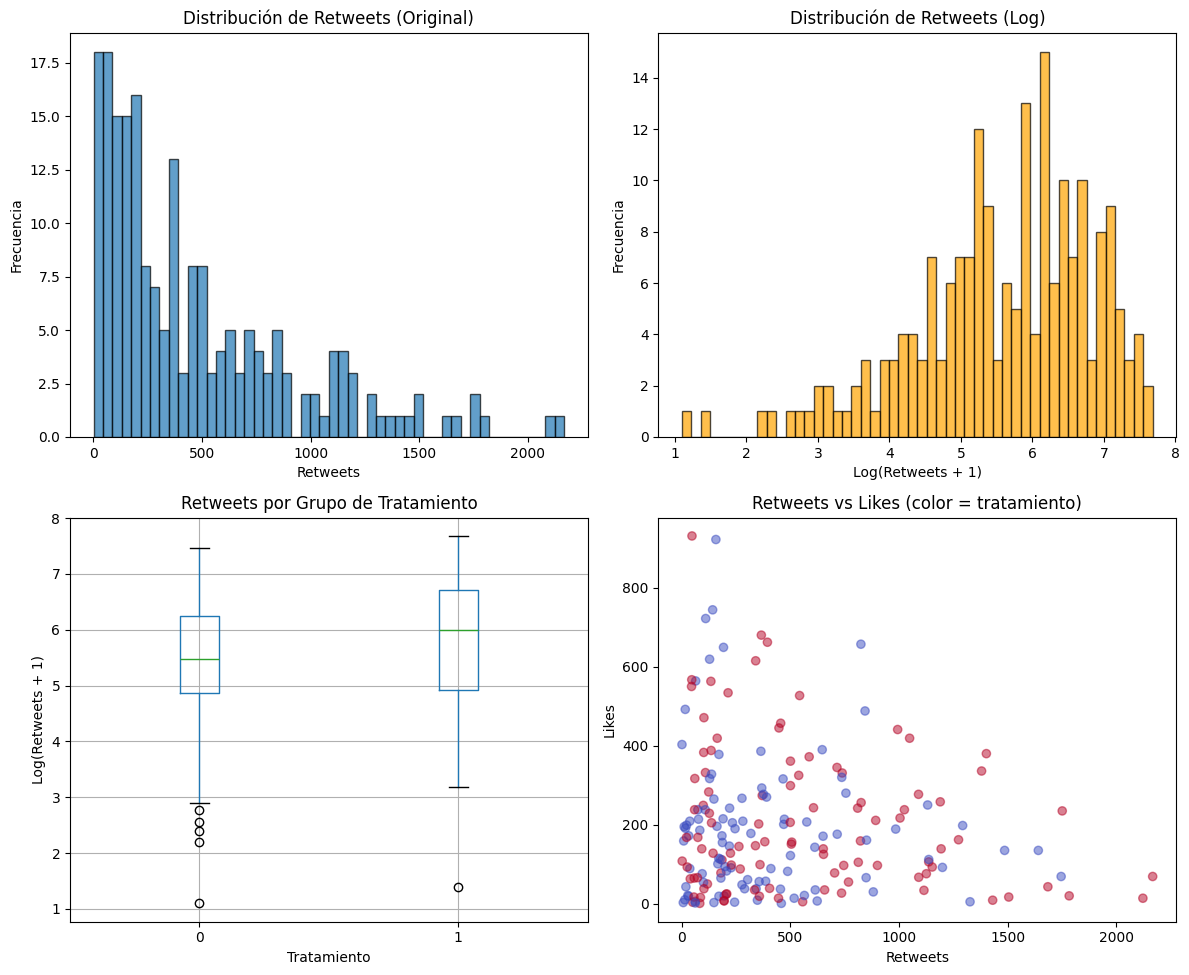

In [37]:
# =============================================================================
# VISUALIZACIÓN CON MATPLOTLIB Y SEABORN
# =============================================================================

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# 1. Histograma de retweets (escala original)
axes[0, 0].hist(df['retweet_count'], bins=50, edgecolor='black', alpha=0.7)
axes[0, 0].set_xlabel('Retweets')
axes[0, 0].set_ylabel('Frecuencia')
axes[0, 0].set_title('Distribución de Retweets (Original)')

# 2. Histograma de log(retweets)
axes[0, 1].hist(df['log_retweets'], bins=50, edgecolor='black', alpha=0.7, color='orange')
axes[0, 1].set_xlabel('Log(Retweets + 1)')
axes[0, 1].set_ylabel('Frecuencia')
axes[0, 1].set_title('Distribución de Retweets (Log)')

# 3. Boxplot por tratamiento
df.boxplot(column='log_retweets', by='treatment', ax=axes[1, 0])
axes[1, 0].set_xlabel('Tratamiento')
axes[1, 0].set_ylabel('Log(Retweets + 1)')
axes[1, 0].set_title('Retweets por Grupo de Tratamiento')
plt.suptitle('')  # Quitar título automático

# 4. Scatter plot
axes[1, 1].scatter(df['retweet_count'], df['like_count'], alpha=0.5, c=df['treatment'], cmap='coolwarm')
axes[1, 1].set_xlabel('Retweets')
axes[1, 1].set_ylabel('Likes')
axes[1, 1].set_title('Retweets vs Likes (color = tratamiento)')

plt.tight_layout()
plt.show()

---
## 7. Resumen y Próximos Pasos

### Lo que Cubrimos Hoy

1. **Configuración**: Entornos virtuales, instalación de paquetes, comparación con R
2. **Tipos de datos**: int, float, str, bool, list, tuple, dict, set
3. **Control de flujo**: for loops, comprensión de listas, funciones
4. **NumPy**: Arreglos, vectorización, indexación booleana
5. **Pandas**: DataFrames, selección, filtrado, groupby, merge
6. **Visualización**: Histogramas, boxplots, scatter plots

### Recursos para Continuar

| Recurso | Nivel | URL |
|---------|-------|-----|
| QuantEcon Python Programming | Intermedio | python-programming.quantecon.org |
| Python for Data Analysis | Intermedio | wesmckinney.com/book |
| Python Data Science Handbook | Intermedio | jakevdp.github.io/PythonDataScienceHandbook |

---
## Tarjeta de Referencia Rápida

```
╔══════════════════════════════════════════════════════════════════╗
║       PYTHON PARA ECONOMÍA APLICADA - REFERENCIA RÁPIDA         ║
╠══════════════════════════════════════════════════════════════════╣
║ TIPOS DE DATOS                                                   ║
║   lista    = [1, 2, 3]        # Mutable, ordenada               ║
║   tupla    = (1, 2, 3)        # Inmutable, ordenada             ║
║   dict     = {'a': 1}         # Pares clave-valor               ║
║   set      = {1, 2, 3}        # Valores únicos                  ║
║   array    = np.array([...])  # Operaciones numéricas rápidas   ║
╠══════════════════════════════════════════════════════════════════╣
║ PANDAS ESENCIAL                                                  ║
║   df.head()                   # Primeras 5 filas                ║
║   df.info()                   # Tipos y valores faltantes       ║
║   df.describe()               # Estadísticas descriptivas       ║
║   df['col']                   # Seleccionar columna             ║
║   df[['a', 'b']]              # Seleccionar múltiples columnas  ║
║   df.loc[condición]           # Filtrar filas                   ║
║   df.groupby('col').mean()    # Estadísticas por grupo          ║
║   df.merge(df2, on='key')     # Unir datasets                   ║
╠══════════════════════════════════════════════════════════════════╣
║ PATRONES COMUNES                                                 ║
║   [x**2 for x in range(10)]   # Comprensión de lista            ║
║   df.assign(nueva = ...)      # Agregar columna                 ║
║   df.to_latex()               # Exportar a LaTeX                ║
╠══════════════════════════════════════════════════════════════════╣
║ TERMINAL (NO EN PYTHON)                                          ║
║   conda create -n mi_env      # Crear entorno                   ║
║   conda activate mi_env       # Activar entorno                 ║
║   conda install pandas        # Instalar paquete                ║
╚══════════════════════════════════════════════════════════════════╝
```